<a href="https://colab.research.google.com/github/surajpandey11/Deep-learning_Capstone-Project/blob/main/Copy_of_Suraj_pandey_Deep_Learning_project_(speech_emotion_recognition).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Deep Learning project -(speech emotion recognition)**

In [1]:
# IMPORT NECESSARY LIBRARIES
import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import numpy as np
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os # interface with underlying OS that python is running on
import sys
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization, Dense
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

# Male Neutral

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# LOAD IN FILE
x, sr = librosa.load('/content/drive/MyDrive/AlmaBetter/Module 7/Week 2/Day 1/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-01-01.wav')

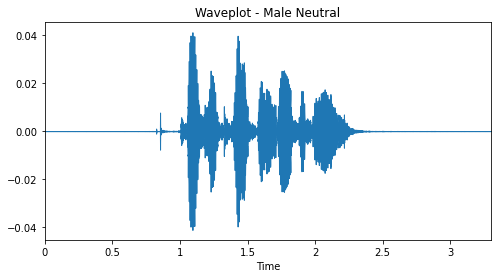

In [8]:
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Male Neutral')
plt.savefig('Waveplot_MaleNeutral.png')

In [ ]:
sound_file = '/content/drive/MyDrive/AlmaBetter/Module 7/Week 2/Day 1/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-01-01.wav'

In [ ]:
Audio(sound_file, autoplay=True)

In [ ]:
# PLAY AUDIO FILE
librosa.output.write_wav('ipd.Audio Files/MaleNeutral.wav', x, sr)
Audio(data=x, rate=sr)

AttributeError: ignored

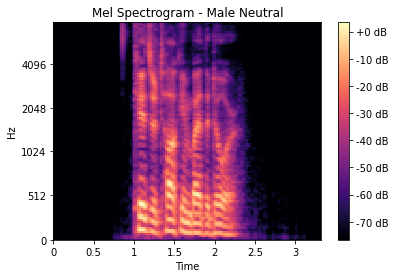

In [ ]:
# CREATE LOG MEL SPECTROGRAM
spectrogram = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)

librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Male Neutral')
plt.savefig('MelSpec_MaleNeutral.png')
plt.colorbar(format='%+2.0f dB');

Female calm

In [ ]:
# LOAD IN FILE
x, sr = librosa.load('/content/drive/MyDrive/AlmaBetter/Module 7/Week 2/Day 1/audio_speech_actors_01-24/Actor_02/03-01-01-01-01-02-02.wav')

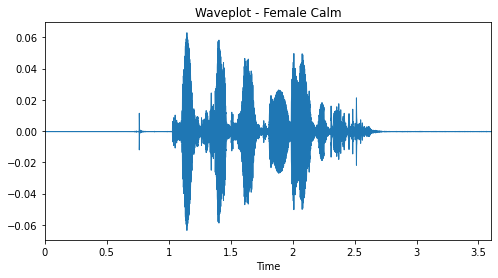

In [ ]:
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Female Calm')
plt.savefig('Waveplot_FemaleCalm.png')

In [ ]:
# PLAY AUDIO FILE
soundfile_2=('/content/drive/MyDrive/AlmaBetter/Module 7/Week 2/Day 1/audio_speech_actors_01-24/Actor_02/03-01-01-01-01-02-02.wav')


In [ ]:
Audio(soundfile_2, autoplay=True)

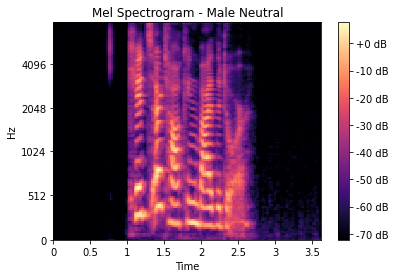

In [ ]:
# CREATE LOG MEL SPECTROGRAM
spectrogram = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)

librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Male Neutral')
plt.savefig('MelSpec_MaleNeutral.png')
plt.colorbar(format='%+2.0f dB');

## Male Happy

In [ ]:
# LOAD IN FILE
# x, sr = librosa.load('# LOAD IN FILE
x, sr = librosa.load('/content/drive/MyDrive/AlmaBetter/Module 7/Week 2/Day 1/audio_speech_actors_01-24/Actor_03/03-01-03-02-01-01-03.wav')

In [ ]:
soundfile_3=('/content/drive/MyDrive/AlmaBetter/Module 7/Week 2/Day 1/audio_speech_actors_01-24/Actor_03/03-01-03-02-01-01-03.wav')

In [ ]:
Audio(soundfile_3, autoplay=True)

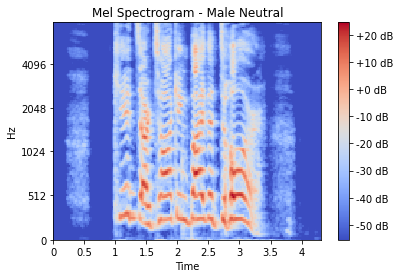

In [ ]:
# CREATE LOG MEL SPECTROGRAM
spectrogram = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)

librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Male Neutral')
plt.savefig('MelSpec_MaleNeutral.png')
plt.colorbar(format='%+2.0f dB');

## Female Sad

In [ ]:
# LOAD FILE
x, sr = librosa.load('/content/drive/MyDrive/AlmaBetter/Module 7/Week 2/Day 1/audio_speech_actors_01-24/Actor_04/03-01-04-02-02-02-04.wav')


In [ ]:
soundfile_3=('/content/drive/MyDrive/AlmaBetter/Module 7/Week 2/Day 1/audio_speech_actors_01-24/Actor_04/03-01-04-02-02-02-04.wav')

In [ ]:
Audio(soundfile_3)

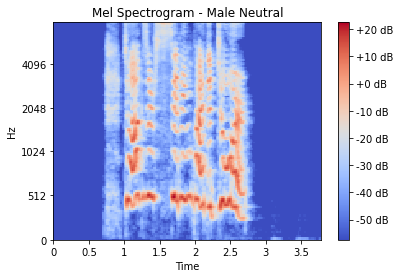

In [ ]:
# CREATE LOG MEL SPECTROGRAM
spectrogram = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)

librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Male Neutral')
plt.savefig('MelSpec_MaleNeutral.png')
plt.colorbar(format='%+2.0f dB');

Male Angry

In [ ]:
# LOAD FILE
x, sr = librosa.load('/content/drive/MyDrive/AlmaBetter/Module 7/Week 2/Day 1/audio_speech_actors_01-24/Actor_05/03-01-05-01-01-02-05.wav')


In [ ]:
soundfile_4=('/content/drive/MyDrive/AlmaBetter/Module 7/Week 2/Day 1/audio_speech_actors_01-24/Actor_05/03-01-05-01-01-02-05.wav')

In [ ]:
Audio(soundfile_4)

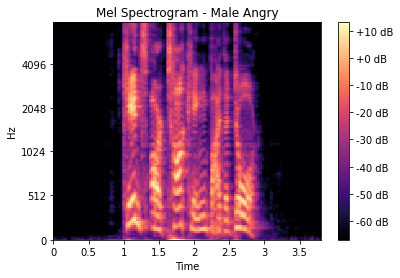

In [ ]:
# DISPLAY LOG MEL SPECTROGRAM
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
y = librosa.power_to_db(x)

librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Male Angry');
plt.savefig('MelSpec_MaleAngry.png')
plt.colorbar(format='%+2.0f dB');

In [9]:
# CREATE DIRECTORY OF AUDIO FILES 
audio = "/content/drive/MyDrive/AlmaBetter/Module 7/Week 2/Day 1/audio_speech_actors_01-24/"
actor_folders = os.listdir(audio) #list files in audio directory
actor_folders.sort() 
actor_folders[0:5]

['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05']

In [10]:
# CREATE FUNCTION TO EXTRACT EMOTION NUMBER, ACTOR AND GENDER LABEL
emotion = []
gender = []
actor = []
file_path = []
for i in actor_folders:
    filename = os.listdir(audio + i) #iterate over Actor folders
    for f in filename: # go through files in Actor folder
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        actor.append(int(part[6]))
        bg = int(part[6])
        if bg%2 == 0:
            bg = "female"
        else:
            bg = "male"
        gender.append(bg)
        file_path.append(audio + i + '/' + f)

In [11]:
# PUT EXTRACTED LABELS WITH FILEPATH INTO DATAFRAME
audio_df = pd.DataFrame(emotion)
audio_df = audio_df.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
audio_df = pd.concat([pd.DataFrame(gender),audio_df,pd.DataFrame(actor)],axis=1)
audio_df.columns = ['gender','emotion','actor']
audio_df = pd.concat([audio_df,pd.DataFrame(file_path, columns = ['path'])],axis=1)
audio_df

gender  ...                                               path
0       male  ...  /content/drive/MyDrive/AlmaBetter/Module 7/Wee...
1       male  ...  /content/drive/MyDrive/AlmaBetter/Module 7/Wee...
2       male  ...  /content/drive/MyDrive/AlmaBetter/Module 7/Wee...
3       male  ...  /content/drive/MyDrive/AlmaBetter/Module 7/Wee...
4       male  ...  /content/drive/MyDrive/AlmaBetter/Module 7/Wee...
...      ...  ...                                                ...
1435  female  ...  /content/drive/MyDrive/AlmaBetter/Module 7/Wee...
1436  female  ...  /content/drive/MyDrive/AlmaBetter/Module 7/Wee...
1437  female  ...  /content/drive/MyDrive/AlmaBetter/Module 7/Wee...
1438  female  ...  /content/drive/MyDrive/AlmaBetter/Module 7/Wee...
1439  female  ...  /content/drive/MyDrive/AlmaBetter/Module 7/Wee...

[1440 rows x 4 columns]

In [5]:
def df_subset(df):
  df= df[(df['emotion']=='happy')|(df['emotion']=='sad')|(df['emotion']=='angry')|(df['emotion']=='calm')]
  return df




In [12]:
audio_df=df_subset(audio_df)

In [13]:
audio_df=audio_df.reset_index()

In [14]:
audio_df

index  gender  ... actor                                               path
0        0    male  ...     1  /content/drive/MyDrive/AlmaBetter/Module 7/Wee...
1        1    male  ...     1  /content/drive/MyDrive/AlmaBetter/Module 7/Wee...
2        3    male  ...     1  /content/drive/MyDrive/AlmaBetter/Module 7/Wee...
3        4    male  ...     1  /content/drive/MyDrive/AlmaBetter/Module 7/Wee...
4        5    male  ...     1  /content/drive/MyDrive/AlmaBetter/Module 7/Wee...
..     ...     ...  ...   ...                                                ...
763   1420  female  ...    24  /content/drive/MyDrive/AlmaBetter/Module 7/Wee...
764   1421  female  ...    24  /content/drive/MyDrive/AlmaBetter/Module 7/Wee...
765   1422  female  ...    24  /content/drive/MyDrive/AlmaBetter/Module 7/Wee...
766   1424  female  ...    24  /content/drive/MyDrive/AlmaBetter/Module 7/Wee...
767   1425  female  ...    24  /content/drive/MyDrive/AlmaBetter/Module 7/Wee...

[768 rows x 5 columns]

In [15]:
# ENSURE GENDER,EMOTION, AND ACTOR COLUMN VALUES ARE CORRECT
pd.set_option('display.max_colwidth', -1)

audio_df.sample(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


index  ...                                                                                                                 path
8    13     ...  /content/drive/MyDrive/AlmaBetter/Module 7/Week 2/Day 1/audio_speech_actors_01-24/Actor_01/03-01-05-01-02-01-01.wav
379  708    ...  /content/drive/MyDrive/AlmaBetter/Module 7/Week 2/Day 1/audio_speech_actors_01-24/Actor_12/03-01-02-02-01-02-12.wav
417  786    ...  /content/drive/MyDrive/AlmaBetter/Module 7/Week 2/Day 1/audio_speech_actors_01-24/Actor_14/03-01-05-02-01-01-14.wav
360  676    ...  /content/drive/MyDrive/AlmaBetter/Module 7/Week 2/Day 1/audio_speech_actors_01-24/Actor_12/03-01-03-01-02-01-12.wav
77   135    ...  /content/drive/MyDrive/AlmaBetter/Module 7/Week 2/Day 1/audio_speech_actors_01-24/Actor_03/03-01-03-01-01-01-03.wav
336  634    ...  /content/drive/MyDrive/AlmaBetter/Module 7/Week 2/Day 1/audio_speech_actors_01-24/Actor_11/03-01-04-01-01-01-11.wav
698  1307   ...  /content/drive/MyDrive/AlmaBetter/Module 7/Week 2/Day 1/audio_speech_actors_01-24/Actor_22/03-01-02-01-01-01-22.wav
328  617    ...  /content/drive/MyDrive/AlmaBetter/Module 7/Week 2/Day 1/audio_speech_actors_01-24/Actor_11/03-01-05-01-01-01-11.wav
714  1333   ...  /content/drive/MyDrive/AlmaBetter/Module 7/Week 2/Day 1/audio_speech_actors_01-24/Actor_23/03-01-05-02-02-02-23.wav
179  338    ...  /content/drive/MyDrive/AlmaBetter/Module 7/Week 2/Day 1/audio_speech_actors_01-24/Actor_06/03-01-02-01-02-02-06.wav

[10 rows x 5 columns]

In [16]:
len(audio_df)

768

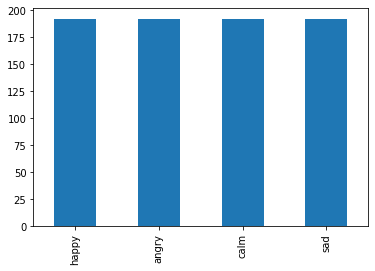

In [17]:
# LOOK AT DISTRIBUTION OF CLASSES
audio_df.emotion.value_counts().plot(kind='bar')

In [18]:
# ITERATE OVER ALL AUDIO FILES AND EXTRACT LOG MEL SPECTROGRAM MEAN VALUES INTO DF FOR MODELING 
df = pd.DataFrame(columns=['mel_spectrogram'])

counter=0

for index,path in enumerate(audio_df.path):
    X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=3,sr=44100,offset=0.5)
    
    #get the mel-scaled spectrogram (ransform both the y-axis (frequency) to log scale, and the “color” axis (amplitude) to Decibels, which is kinda the log scale of amplitudes.)
    spectrogram = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=128,fmax=8000) 
    db_spec = librosa.power_to_db(spectrogram)
    #temporally average spectrogram
    log_spectrogram = np.mean(db_spec, axis = 0)
        
    # Mel-frequency cepstral coefficients (MFCCs)
    # mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
    # mfcc=np.mean(mfcc,axis=0)
    
    # compute chroma energy (pertains to 12 different pitch classes)
#     chroma = librosa.feature.chroma_stft(y=X, sr=sample_rate)
#     chroma = np.mean(chroma, axis = 0)

    # compute spectral contrast
#     contrast = librosa.feature.spectral_contrast(y=X, sr=sample_rate)
#     contrast = np.mean(contrast, axis= 0)

    # compute zero-crossing-rate (zcr:the zcr is the rate of sign changes along a signal i.e.m the rate at 
#     which the signal changes from positive to negative or back - separation of voiced andunvoiced speech.)
#     zcr = librosa.feature.zero_crossing_rate(y=X)
#     zcr = np.mean(zcr, axis= 0)
    
    df.loc[counter] = [log_spectrogram]
    counter=counter+1   

print(len(df))
df.head()

768


mel_spectrogram
0  [-73.08545, -73.06073, -73.085915, -73.12457, -73.108025, -72.65337, -72.549866, -72.89703, -73.12078, -73.12457, -73.113785, -73.01144, -72.9532, -73.06832, -73.12457, -73.03467, -72.99564, -73.04725, -72.94586, -73.058136, -73.12457, -73.12457, -73.12457, -73.07702, -72.8043, -69.65314, -69.21911, -71.91962, -72.160576, -72.68833, -72.868065, -72.87882, -72.91643, -72.915985, -72.4444, -72.66581, -72.6355, -72.61032, -72.47419, -71.706764, -71.65762, -71.75756, -48.666473, -40.95615, -40.452827, -42.667084, -43.889606, -42.839478, -37.71336, -33.119637, -31.746637, -32.33637, -32.4861, -33.12351, -35.113575, -36.38935, -38.98885, -43.86175, -47.502438, -50.25599, -50.25875, -47.561146, -44.007397, -40.805496, -34.942894, -32.564137, -31.203123, -30.8943, -32.14281, -31.747736, -32.78739, -36.987144, -41.524574, -45.368187, -48.73964, -50.793327, -38.86303, -32.177807, -32.574722, -34.50673, -34.53739, -34.818436, -34.998863, -35.118748, -35.15317, -33.08846, -31.035885, -31.212715, -32.803474, -34.173473, -35.749706, -33.753975, -30.796072, -30.043753, -31.57202, -35.48372, -40.222042, -45.091373, -41.942368, -37.47157, ...]                                  
1  [-65.43614, -65.43614, -65.43614, -65.43614, -65.43614, -65.43614, -65.43614, -65.43614, -65.43614, -65.43614, -65.43614, -65.43614, -65.43614, -65.43614, -65.43614, -65.43614, -65.43614, -65.43614, -65.43614, -65.43471, -65.42327, -65.31444, -58.960674, -54.502064, -56.45181, -55.395706, -52.12382, -50.853504, -50.254894, -49.951332, -50.150967, -50.32156, -50.84629, -51.57642, -53.01905, -54.49201, -53.025604, -53.254456, -58.77285, -62.759502, -63.40469, -63.115887, -59.924698, -38.994232, -30.926617, -27.069971, -24.16959, -22.520874, -22.608843, -22.973639, -23.60332, -24.398914, -23.686491, -23.068937, -22.703522, -22.549768, -22.51479, -22.340828, -22.775764, -23.70363, -23.304804, -23.83159, -24.787855, -25.655138, -26.453026, -27.207363, -27.278002, -26.784813, -27.30294, -28.470688, -30.522781, -32.26331, -34.785736, -38.520557, -41.775074, -43.928562, -46.052437, -47.231808, -46.96415, -40.265743, -35.858364, -33.815674, -34.212246, -34.37295, -35.48382, -37.564373, -38.764507, -36.612305, -31.831818, -29.847843, -31.577885, -36.02498, -40.044285, -41.14655, -38.876266, -33.41184, -29.559994, -27.543344, -25.895037, -25.193441, ...]                 
2  [-63.53075, -63.54429, -63.54491, -63.56063, -63.562016, -63.562016, -63.562016, -63.562016, -63.562016, -63.562016, -63.562016, -63.562016, -63.562016, -63.562016, -63.562016, -63.562016, -63.562016, -63.562016, -63.562016, -63.562016, -63.562016, -63.562016, -63.562016, -63.562016, -63.562016, -59.66234, -53.595573, -51.83847, -52.61146, -52.99392, -51.917835, -51.526638, -52.41301, -53.430996, -54.608078, -55.45881, -56.62043, -57.618073, -60.357735, -62.5205, -63.224545, -63.095272, -63.008698, -63.374714, -46.87612, -33.06851, -29.384605, -29.112955, -28.976137, -30.072426, -30.177967, -30.497341, -28.767365, -26.678505, -24.943216, -25.465185, -26.503939, -25.95406, -24.827383, -24.797165, -26.946913, -31.199448, -36.6725, -37.782658, -38.124355, -42.03266, -45.695087, -46.257748, -45.28638, -42.93292, -39.616665, -36.17431, -34.95391, -34.324726, -32.900715, -30.774723, -30.73499, -32.348858, -36.680935, -42.534702, -45.375603, -43.22228, -40.957745, -38.563297, -37.61681, -37.737934, -39.80406, -44.311752, -51.856228, -54.899883, -55.424713, -52.095066, -42.376945, -34.177914, -30.179386, -28.633396, -27.145718, -26.453495, -26.029829, -26.518793, ...]
3  [-79.12307, -79.12307, -79.12307, -79.12307, -79.09131, -79.014755, -79.03434, -79.01148, -78.7761, -78.95184, -79.12307, -79.12307, -79.12307, -79.12307, -79.118515, -79.10881, -79.12307, -79.12307, -79.12307, -79.12307, -79.12307, -79.12307, -79.12307, -79.12307, -79.12307, -78.893616, -77.490425, -78.30809, -79.01049, -79.11681, -79.12307, -79.05406, -79.109474, -78.99845, -79.11315, -78.265396, -74.392555, -70.2233, -70.00303, 

In [ ]:
len(df.iloc[0,0])

256

In [ ]:
pd.DataFrame(df['mel_spectrogram'].values.tolist())

0          1          2  ...        256        257        258
0    -73.085449 -73.060730 -73.085915  ... NaN        NaN        NaN       
1    -65.436142 -65.436142 -65.436142  ... -65.436142 -65.393250 -65.153008
2    -75.150711 -75.150711 -75.150711  ... NaN        NaN        NaN       
3    -63.530750 -63.544289 -63.544910  ... -63.562016 -63.562016 -63.562016
4    -79.123070 -79.123070 -79.123070  ... -79.123070 -79.123070 -79.123070
...         ...        ...        ...  ...        ...        ...        ...
1435 -68.403206 -68.403206 -68.403206  ... NaN        NaN        NaN       
1436 -65.623550 -65.623550 -65.623550  ... NaN        NaN        NaN       
1437 -66.554070 -66.554070 -66.554070  ... -64.025047 -64.527412 -63.976700
1438 -63.501076 -63.501076 -63.420914  ... -63.420380 -63.217319 -63.165489
1439 -68.237564 -67.372169 -66.390640  ... -58.699448 -58.785629 -59.667213

[1440 rows x 259 columns]

In [ ]:
p

In [19]:
# TURN ARRAY INTO LIST AND JOIN WITH AUDIO_DF TO GET CORRESPONDING EMOTION LABELS
df_combined = pd.concat([audio_df,pd.DataFrame(df['mel_spectrogram'].values.tolist())],axis=1)
df_combined = df_combined.fillna(0)

In [20]:
df_combined

index  gender emotion  actor  ...        255        256        257        258
0    0      male    happy   1      ... -73.046173  0.000000   0.000000   0.000000 
1    1      male    happy   1      ... -65.436142 -65.436142 -65.393250 -65.153008
2    3      male    angry   1      ... -63.562016 -63.562016 -63.562016 -63.562016
3    4      male    calm    1      ... -79.080887 -79.123070 -79.123070 -79.123070
4    5      male    calm    1      ... -80.051094 -80.086205 -79.897118 -79.750298
..  ..       ...     ...   ..      ...        ...        ...        ...        ...
763  1420   female  sad     24     ... -66.303940 -66.424660 -66.299713 -66.222488
764  1421   female  happy   24     ... -72.331390 -72.165474 -72.325645 -72.714546
765  1422   female  calm    24     ... -78.762161 -81.063866 -81.746765 -80.073654
766  1424   female  angry   24     ... -43.090221 -44.254448 -39.674244 -35.284248
767  1425   female  happy   24     ... -63.450222 -63.413048 -63.513493 -63.522919

[768 rows x 264 columns]

In [ ]:
# df_combined.to_csv("anurag.csv")

In [21]:
# DROP PATH COLUMN FOR MODELING
df_combined.drop(columns='path',inplace=True)

In [ ]:
df_combined.drop(columns='index',inplace=True)

In [ ]:
# CHECK TOP 5 ROWS
df_combined.head()

gender emotion  actor          0  ...        255        256        257        258
0  male   happy   1     -63.311062  ... -62.824276  0.000000   0.000000   0.000000 
1  male   happy   1     -57.414993  ... -57.414993 -57.414993 -56.832729 -55.191196
2  male   angry   1     -55.507362  ... -55.932133 -55.932133 -55.932133 -55.932133
3  male   calm    1     -69.243256  ... -68.733047 -69.243256 -69.243256 -69.243256
4  male   calm    1     -70.746513  ... -70.159462 -70.445366 -68.199043 -67.414200

[5 rows x 262 columns]

In [ ]:
len(df_combined)

768

In [ ]:
# TRAIN TEST SPLIT DATA
train,test = train_test_split(df_combined, test_size=0.2, random_state=0,
                               stratify=df_combined[['emotion','gender','actor']])

In [ ]:
X_train = train.iloc[:, 3:]
y_train = train.iloc[:,:2].drop(columns=['gender'])
print(X_train.shape)
print(y_train.shape)

(614, 259)
(614, 1)


In [ ]:
X_test = test.iloc[:,3:]
y_test = test.iloc[:,:2].drop(columns=['gender'])
print(X_test.shape)
print(y_test.shape)

(154, 259)
(154, 1)


In [ ]:
X_test = test.iloc[:,3:]
y_test = test.iloc[:,:2].drop(columns=['gender'])
print(X_test.shape)

(154, 259)


In [ ]:
# TURN DATA INTO ARRAYS FOR KERAS
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [ ]:
len(y_train)


614

In [ ]:
# ONE HOT ENCODE THE TARGET
# CNN REQUIRES INPUT AND OUTPUT ARE NUMBERS
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))

print(y_train[0:10])

[[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]]


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
np.unique(y_test)

array([0., 1.], dtype=float32)

In [ ]:
# RESHAPE DATA TO INCLUDE 3D TENSOR 
X_train = X_train[:,:,np.newaxis]
X_test = X_test[:,:,np.newaxis]

X_train.shape

(614, 259, 1)

In [ ]:
import tensorflow
print(tensorflow.__version__)

2.4.1


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model

#BUILD 1D CNN LAYERS
model = tf.keras.Sequential()
model.add(layers.Conv1D(64, kernel_size=(10), activation='relu', input_shape=(X_train.shape[1],1)))
model.add(layers.Conv1D(128, kernel_size=(10),activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(layers.MaxPooling1D(pool_size=(8)))
model.add(layers.Dropout(0.4))
model.add(layers.Conv1D(128, kernel_size=(10),activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(8)))
model.add(layers.Dropout(0.4))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(4, activation='sigmoid'))
opt = keras.optimizers.Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 250, 64)           704       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 241, 128)          82048     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 30, 128)           0         
_________________________________________________________________
dropout (Dropout)            (None, 30, 128)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 21, 128)           163968    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 2, 128)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2, 128)            0

In [ ]:
import tensorflow.keras as keras

# FIT MODEL AND USE CHECKPOINT TO SAVE BEST MODEL
checkpoint = ModelCheckpoint("best_initial_model.hdf5", monitor='val_accuracy', verbose=1,
    save_best_only=True, mode='max', period=1, save_weights_only=True)

model_history=model.fit(X_train, y_train,batch_size=32, epochs=40, validation_data=(X_test, y_test),callbacks=[checkpoint])



Epoch 1/40
20/20 [==============================] - 4s 149ms/step - loss: 4.6019 - accuracy: 0.2576 - val_loss: 1.8196 - val_accuracy: 0.2403

Epoch 00001: val_accuracy improved from -inf to 0.24026, saving model to best_initial_model.hdf5
Epoch 2/40
20/20 [==============================] - 3s 134ms/step - loss: 1.7787 - accuracy: 0.2426 - val_loss: 1.6640 - val_accuracy: 0.2532

Epoch 00002: val_accuracy improved from 0.24026 to 0.25325, saving model to best_initial_model.hdf5
Epoch 3/40
20/20 [==============================] - 3s 132ms/step - loss: 1.6553 - accuracy: 0.2823 - val_loss: 1.6005 - val_accuracy: 0.3636

Epoch 00003: val_accuracy improved from 0.25325 to 0.36364, saving model to best_initial_model.hdf5
Epoch 4/40
20/20 [==============================] - 3s 133ms/step - loss: 1.6035 - accuracy: 0.2559 - val_loss: 1.5832 - val_accuracy: 0.2532

Epoch 00004: val_accuracy did not improve from 0.36364
Epoch 5/40
20/20 [==============================] - 3s 133ms/step - loss: 1.

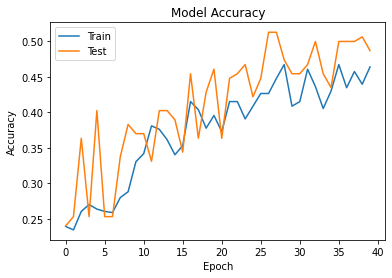

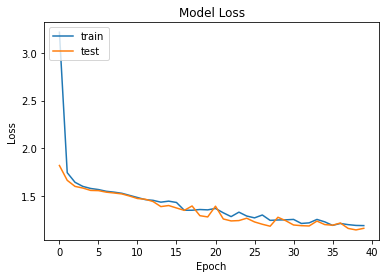

In [ ]:
# PLOT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('Initial_Model_Accuracy.png')
plt.show()
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('Initial_Model_loss.png')
plt.show()

In [ ]:
# PRINT LOSS AND ACCURACY PERCENTAGE ON TEST SET
print("Loss of the model is - " , model.evaluate(X_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

5/5 [==============================] - 0s 32ms/step - loss: 1.1610 - accuracy: 0.4870
Loss of the model is -  1.160995602607727
5/5 [==============================] - 0s 31ms/step - loss: 1.1610 - accuracy: 0.4870
Accuracy of the model is -  48.701298236846924 %


In [ ]:
# PREDICTIONS
predictions = model.predict(X_test)
predictions=predictions.argmax(axis=1)
predictions = predictions.astype(int).flatten()
predictions = (lb.inverse_transform((predictions)))
predictions = pd.DataFrame({'Predicted Values': predictions})

# ACTUAL LABELS
actual=y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform((actual)))
actual = pd.DataFrame({'Actual Values': actual})

# COMBINE BOTH 
finaldf = actual.join(predictions)
finaldf[140:150]

Actual Values Predicted Values
140  angry         angry          
141  calm          calm           
142  calm          calm           
143  calm          calm           
144  sad           calm           
145  sad           happy          
146  happy         happy          
147  angry         angry          
148  angry         angry          
149  angry         angry

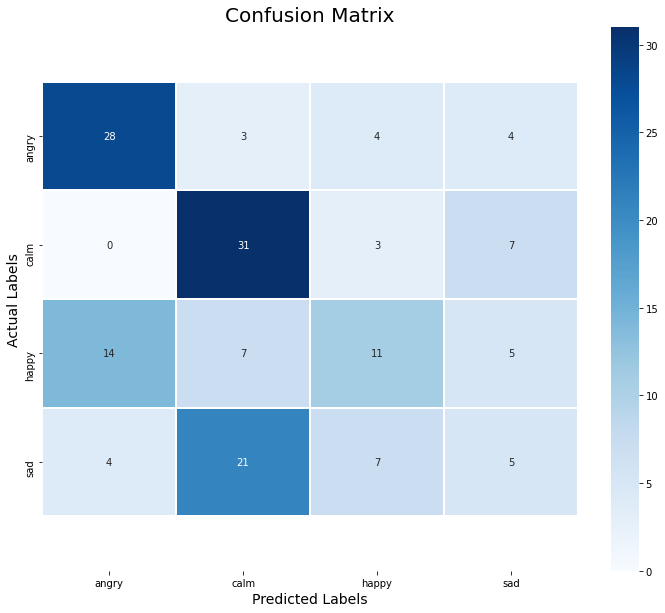

In [ ]:
# CREATE CONFUSION MATRIX OF ACTUAL VS. PREDICTION 
cm = confusion_matrix(actual, predictions)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])
ax = sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.savefig('Initial_Model_Confusion_Matrix.png')
plt.show()

In [ ]:
print(classification_report(actual, predictions, target_names = ['angry','calm','happy','sad']))

              precision    recall  f1-score   support

       angry       0.61      0.72      0.66        39
        calm       0.50      0.76      0.60        41
       happy       0.44      0.30      0.35        37
         sad       0.24      0.14      0.17        37

    accuracy                           0.49       154
   macro avg       0.45      0.48      0.45       154
weighted avg       0.45      0.49      0.45       154



## ** Conv2D**

In [ ]:
'''
1. Data Augmentation method   
'''
def speedNpitch(data):
    """
    Speed and Pitch Tuning.
    """
    # you can change low and high here
    length_change = np.random.uniform(low=0.8, high = 1)
    speed_fac = 1.2  / length_change # try changing 1.0 to 2.0 ... =D
    tmp = np.interp(np.arange(0,len(data),speed_fac),np.arange(0,len(data)),data)
    minlen = min(data.shape[0], tmp.shape[0])
    data *= 0
    data[0:minlen] = tmp[0:minlen]
    return data

'''
2. Extracting the MFCC feature as an image (Matrix format).  
'''
def prepare_data(df, n, aug, mfcc):
    X = np.empty(shape=(df.shape[0], n, 216, 1))
    input_length = sampling_rate * audio_duration
    
    cnt = 0
    for fname in tqdm(df.path):
        file_path = fname
        data, _ = librosa.load(file_path, sr=sampling_rate
                               ,res_type="kaiser_fast"
                               ,duration=2.5
                               ,offset=0.5
                              )

        # Random offset / Padding
        if len(data) > input_length:
            max_offset = len(data) - input_length
            offset = np.random.randint(max_offset)
            data = data[offset:(input_length+offset)]
        else:
            if input_length > len(data):
                max_offset = input_length - len(data)
                offset = np.random.randint(max_offset)
            else:
                offset = 0
            data = np.pad(data, (offset, int(input_length) - len(data) - offset), "constant")

        # Augmentation? 
        if aug == 1:
            data = speedNpitch(data)
        
        # which feature?
        if mfcc == 1:
            # MFCC extraction 
            MFCC = librosa.feature.mfcc(data, sr=sampling_rate, n_mfcc=n_mfcc)
            MFCC = np.expand_dims(MFCC, axis=-1)
            X[cnt,] = MFCC
            
        else:
            # Log-melspectogram
            melspec = librosa.feature.melspectrogram(data, n_mels = n_melspec)   
            logspec = librosa.amplitude_to_db(melspec)
            logspec = np.expand_dims(logspec, axis=-1)
            X[cnt,] = logspec
            
        cnt += 1
    
    return X


'''
3. Confusion matrix plot 
'''        
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    '''Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.

    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.

    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    '''
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")

    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    
    
'''
# 4. Create the 2D CNN model 
'''
def get_2d_conv_model(n):
    ''' Create a standard deep 2D convolutional neural network'''
    nclass = 14
    inp = Input(shape=(n,216,1))  #2D matrix of 30 MFCC bands by 216 audio length.
    x = Convolution2D(32, (4,10), padding="same")(inp)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Flatten()(x)
    x = Dense(64)(x)
    x = Dropout(rate=0.2)(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Dropout(rate=0.2)(x)
    
    out = Dense(nclass, activation=softmax)(x)
    model = models.Model(inputs=inp, outputs=out)
    
    opt = optimizers.Adam(0.001)
    model.compile(optimizer=opt, loss=losses.categorical_crossentropy, metrics=['acc'])
    return model

'''
# 5. Other functions 
'''
class get_results:
    '''
    We're going to create a class (blueprint template) for generating the results based on the various model approaches. 
    So instead of repeating the functions each time, we assign the results into on object with its associated variables 
    depending on each combination:
        1) MFCC with no augmentation  
        2) MFCC with augmentation 
        3) Logmelspec with no augmentation 
        4) Logmelspec with augmentation
    '''
    
    def __init__(self, model_history, model ,X_test, y_test, labels):
        self.model_history = model_history
        self.model = model
        self.X_test = X_test
        self.y_test = y_test             
        self.labels = labels

    def create_plot(self, model_history):
        '''Check the logloss of both train and validation, make sure they are close and have plateau'''
        plt.plot(model_history.history['loss'])
        plt.plot(model_history.history['val_loss'])
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()

    def create_results(self, model):
        '''predict on test set and get accuracy results'''
        opt = optimizers.Adam(0.001)
        model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
        score = model.evaluate(X_test, y_test, verbose=0)
        print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

    def confusion_results(self, X_test, y_test, labels, model):
        '''plot confusion matrix results'''
        preds = model.predict(X_test, 
                                 batch_size=16, 
                                 verbose=2)
        preds=preds.argmax(axis=1)
        preds = preds.astype(int).flatten()
        preds = (lb.inverse_transform((preds)))

        actual = y_test.argmax(axis=1)
        actual = actual.astype(int).flatten()
        actual = (lb.inverse_transform((actual)))

        classes = labels
        classes.sort()    

        c = confusion_matrix(actual, preds)
        print_confusion_matrix(c, class_names = classes)
    
    def accuracy_results_gender(self, X_test, y_test, labels, model):
        '''Print out the accuracy score and confusion matrix heat map of the Gender classification results'''
    
        preds = model.predict(X_test, 
                         batch_size=16, 
                         verbose=2)
        preds=preds.argmax(axis=1)
        preds = preds.astype(int).flatten()
        preds = (lb.inverse_transform((preds)))

        actual = y_test.argmax(axis=1)
        actual = actual.astype(int).flatten()
        actual = (lb.inverse_transform((actual)))
        
        # print(accuracy_score(actual, preds))
        
        actual = pd.DataFrame(actual).replace({'female_angry':'female'
                   , 'female_disgust':'female'
                   , 'female_fear':'female'
                   , 'female_happy':'female'
                   , 'female_sad':'female'
                   , 'female_surprise':'female'
                   , 'female_neutral':'female'
                   , 'male_angry':'male'
                   , 'male_fear':'male'
                   , 'male_happy':'male'
                   , 'male_sad':'male'
                   , 'male_surprise':'male'
                   , 'male_neutral':'male'
                   , 'male_disgust':'male'
                  })
        preds = pd.DataFrame(preds).replace({'female_angry':'female'
               , 'female_disgust':'female'
               , 'female_fear':'female'
               , 'female_happy':'female'
               , 'female_sad':'female'
               , 'female_surprise':'female'
               , 'female_neutral':'female'
               , 'male_angry':'male'
               , 'male_fear':'male'
               , 'male_happy':'male'
               , 'male_sad':'male'
               , 'male_surprise':'male'
               , 'male_neutral':'male'
               , 'male_disgust':'male'
              })

        classes = actual.loc[:,0].unique() 
        classes.sort()    

        c = confusion_matrix(actual, preds)
        print(accuracy_score(actual, preds))
        print_confusion_matrix(c, class_names = classes)

In [ ]:
sampling_rate=44100
audio_duration=3
n_mfcc = 30
mfcc = prepare_data(audio_df, n = n_mfcc, aug = 0, mfcc = 1)

NameError: ignored

In [ ]:
import keras
from keras import regularizers
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.utils import np_utils, to_categorical
from keras.callbacks import (EarlyStopping, LearningRateScheduler,
                             ModelCheckpoint, TensorBoard, ReduceLROnPlateau)
from keras import losses, models, optimizers
from keras.activations import relu, softmax
from keras.layers import (Convolution2D, GlobalAveragePooling2D, BatchNormalization, Flatten, Dropout,
                          GlobalMaxPool2D, MaxPool2D, concatenate, Activation, Input, Dense)

# sklearn
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Other  
from tqdm import tqdm, tqdm_pandas
import scipy
from scipy.stats import skew
import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import seaborn as sns
import glob 
import os
import sys
import IPython.display as ipd  # To play sound in the notebook
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [ ]:
'''
1. Data Augmentation method   
'''
def speedNpitch(data):
    """
    Speed and Pitch Tuning.
    """
    # you can change low and high here
    length_change = np.random.uniform(low=0.8, high = 1)
    speed_fac = 1.2  / length_change # try changing 1.0 to 2.0 ... =D
    tmp = np.interp(np.arange(0,len(data),speed_fac),np.arange(0,len(data)),data)
    minlen = min(data.shape[0], tmp.shape[0])
    data *= 0
    data[0:minlen] = tmp[0:minlen]
    return data

'''
2. Extracting the MFCC feature as an image (Matrix format).  
'''
def prepare_data(df, n, aug, mfcc):
    X = np.empty(shape=(df.shape[0], n, 216, 1))
    input_length = sampling_rate * audio_duration
    
    cnt = 0
    for fname in tqdm(df.path):
        file_path = fname
        data, _ = librosa.load(file_path, sr=sampling_rate
                               ,res_type="kaiser_fast"
                               ,duration=2.5
                               ,offset=0.5
                              )

        # Random offset / Padding
        if len(data) > input_length:
            max_offset = len(data) - input_length
            offset = np.random.randint(max_offset)
            data = data[offset:(input_length+offset)]
        else:
            if input_length > len(data):
                max_offset = input_length - len(data)
                offset = np.random.randint(max_offset)
            else:
                offset = 0
            data = np.pad(data, (offset, int(input_length) - len(data) - offset), "constant")

        # Augmentation? 
        if aug == 1:
            data = speedNpitch(data)
        
        # which feature?
        if mfcc == 1:
            # MFCC extraction 
            MFCC = librosa.feature.mfcc(data, sr=sampling_rate, n_mfcc=n_mfcc)
            MFCC = np.expand_dims(MFCC, axis=-1)
            X[cnt,] = MFCC
            
        else:
            # Log-melspectogram
            melspec = librosa.feature.melspectrogram(data, n_mels = n_melspec)   
            logspec = librosa.amplitude_to_db(melspec)
            logspec = np.expand_dims(logspec, axis=-1)
            X[cnt,] = logspec
            
        cnt += 1
    
    return X


'''
3. Confusion matrix plot 
'''        
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    '''Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.

    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.

    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    '''
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")

    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    
    
'''
# 4. Create the 2D CNN model 
'''
def get_2d_conv_model(n):
    ''' Create a standard deep 2D convolutional neural network'''
    nclass = 4
    inp = Input(shape=(n,216,1))  #2D matrix of 30 MFCC bands by 216 audio length.
    x = Convolution2D(32, (4,10), padding="same")(inp)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Flatten()(x)
    x = Dense(64)(x)
    x = Dropout(rate=0.2)(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Dropout(rate=0.2)(x)
    
    out = Dense(nclass, activation=softmax)(x)
    model = models.Model(inputs=inp, outputs=out)
    
    opt = optimizers.Adam(0.001)
    model.compile(optimizer=opt, loss=losses.categorical_crossentropy, metrics=['acc'])
    return model

'''
# 5. Other functions 
'''
class get_results:
    '''
    We're going to create a class (blueprint template) for generating the results based on the various model approaches. 
    So instead of repeating the functions each time, we assign the results into on object with its associated variables 
    depending on each combination:
        1) MFCC with no augmentation  
        2) MFCC with augmentation 
        3) Logmelspec with no augmentation 
        4) Logmelspec with augmentation
    '''
    
    def __init__(self, model_history, model ,X_test, y_test, labels):
        self.model_history = model_history
        self.model = model
        self.X_test = X_test
        self.y_test = y_test             
        self.labels = labels

    def create_plot(self, model_history):
        '''Check the logloss of both train and validation, make sure they are close and have plateau'''
        plt.plot(model_history.history['loss'])
        plt.plot(model_history.history['val_loss'])
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()

    def create_results(self, model):
        '''predict on test set and get accuracy results'''
        opt = optimizers.Adam(0.001)
        model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
        score = model.evaluate(X_test, y_test, verbose=0)
        print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

    def confusion_results(self, X_test, y_test, labels, model):
        '''plot confusion matrix results'''
        preds = model.predict(X_test, 
                                 batch_size=16, 
                                 verbose=2)
        preds=preds.argmax(axis=1)
        preds = preds.astype(int).flatten()
        preds = (lb.inverse_transform((preds)))

        actual = y_test.argmax(axis=1)
        actual = actual.astype(int).flatten()
        actual = (lb.inverse_transform((actual)))

        classes = labels
        classes.sort()    

        c = confusion_matrix(actual, preds)
        print_confusion_matrix(c, class_names = classes)
    
    def accuracy_results_gender(self, X_test, y_test, labels, model):
        '''Print out the accuracy score and confusion matrix heat map of the Gender classification results'''
    
        preds = model.predict(X_test, 
                         batch_size=16, 
                         verbose=2)
        preds=preds.argmax(axis=1)
        preds = preds.astype(int).flatten()
        preds = (lb.inverse_transform((preds)))

        actual = y_test.argmax(axis=1)
        actual = actual.astype(int).flatten()
        actual = (lb.inverse_transform((actual)))
        
        # print(accuracy_score(actual, preds))
        
        actual = pd.DataFrame(actual).replace({'female_angry':'female'
                   , 'female_disgust':'female'
                   , 'female_fear':'female'
                   , 'female_happy':'female'
                   , 'female_sad':'female'
                   , 'female_surprise':'female'
                   , 'female_neutral':'female'
                   , 'male_angry':'male'
                   , 'male_fear':'male'
                   , 'male_happy':'male'
                   , 'male_sad':'male'
                   , 'male_surprise':'male'
                   , 'male_neutral':'male'
                   , 'male_disgust':'male'
                  })
        preds = pd.DataFrame(preds).replace({'female_angry':'female'
               , 'female_disgust':'female'
               , 'female_fear':'female'
               , 'female_happy':'female'
               , 'female_sad':'female'
               , 'female_surprise':'female'
               , 'female_neutral':'female'
               , 'male_angry':'male'
               , 'male_fear':'male'
               , 'male_happy':'male'
               , 'male_sad':'male'
               , 'male_surprise':'male'
               , 'male_neutral':'male'
               , 'male_disgust':'male'
              })

        classes = actual.loc[:,0].unique() 
        classes.sort()    

        c = confusion_matrix(actual, preds)
        print(accuracy_score(actual, preds))
        print_confusion_matrix(c, class_names = classes)

In [ ]:
sampling_rate=44100
audio_duration=2.5
n_mfcc = 30
mfcc = prepare_data(audio_df, n = n_mfcc, aug = 0, mfcc = 1)



  0%|          | 0/768 [00:00<?, ?it/s]

  0%|          | 2/768 [00:00<00:51, 14.82it/s]

  1%|          | 4/768 [00:00<00:53, 14.38it/s]

  1%|          | 6/768 [00:00<00:54, 14.10it/s]

  1%|          | 8/768 [00:00<00:56, 13.45it/s]

  1%|▏         | 10/768 [00:00<00:56, 13.46it/s]

  2%|▏         | 12/768 [00:00<00:56, 13.28it/s]

  2%|▏         | 14/768 [00:01<00:56, 13.31it/s]

  2%|▏         | 16/768 [00:01<00:57, 13.08it/s]

  2%|▏         | 18/768 [00:01<00:57, 13.04it/s]

  3%|▎         | 20/768 [00:01<00:56, 13.22it/s]

  3%|▎         | 22/768 [00:01<00:56, 13.18it/s]

  3%|▎         | 24/768 [00:01<00:55, 13.32it/s]

  3%|▎         | 26/768 [00:01<00:55, 13.44it/s]

  4%|▎         | 28/768 [00:02<00:54, 13.46it/s]

  4%|▍         | 30/768 [00:02<00:55, 13.34it/s]

  4%|▍         | 32/768 [00:02<00:55, 13.36it/s]

  4%|▍         | 34/768 [00:02<00:54, 13.49it/s]

  5%|▍         | 36/768 [00:02<00:55, 13.22it/s]

  5%|▍         | 38/768 [00:02<00:54, 13.29it/s]

  5%|▌     

In [ ]:
# Split between train and test 
X_train, X_test, y_train, y_test = train_test_split(mfcc
                                                    , audio_df.emotion
                                                    , test_size=0.25
                                                    , shuffle=True
                                                    , random_state=42
                                                   )


# one hot encode the target 
lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

# Normalization as per the standard NN process
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

# Build CNN model 
model = get_2d_conv_model(n=n_mfcc)
model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                    batch_size=16, verbose = 2, epochs=20)

Epoch 1/20
36/36 - 19s - loss: 1.4738 - acc: 0.3611 - val_loss: 1.3422 - val_acc: 0.3021
Epoch 2/20
36/36 - 18s - loss: 1.2580 - acc: 0.4479 - val_loss: 1.5997 - val_acc: 0.2917
Epoch 3/20
36/36 - 18s - loss: 1.1169 - acc: 0.4931 - val_loss: 2.9054 - val_acc: 0.2188
Epoch 4/20
36/36 - 18s - loss: 0.9381 - acc: 0.5920 - val_loss: 2.9737 - val_acc: 0.2240
Epoch 5/20
36/36 - 18s - loss: 0.8464 - acc: 0.6250 - val_loss: 2.6576 - val_acc: 0.2552
Epoch 6/20
36/36 - 18s - loss: 0.7623 - acc: 0.6875 - val_loss: 1.8671 - val_acc: 0.3333
Epoch 7/20
36/36 - 18s - loss: 0.7325 - acc: 0.6944 - val_loss: 1.8788 - val_acc: 0.4271
Epoch 8/20
36/36 - 18s - loss: 0.6982 - acc: 0.7049 - val_loss: 1.1373 - val_acc: 0.5573
Epoch 9/20
36/36 - 18s - loss: 0.6497 - acc: 0.7326 - val_loss: 1.0368 - val_acc: 0.6094
Epoch 10/20
36/36 - 18s - loss: 0.5776 - acc: 0.7726 - val_loss: 1.7282 - val_acc: 0.4167
Epoch 11/20
36/36 - 18s - loss: 0.4741 - acc: 0.8229 - val_loss: 0.8186 - val_acc: 0.6198
Epoch 12/20
36/36 -

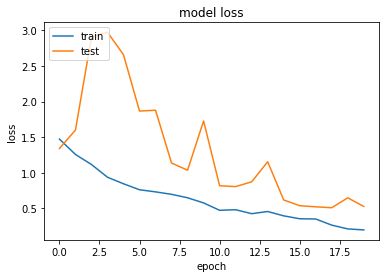

accuracy: 80.21%
12/12 - 1s


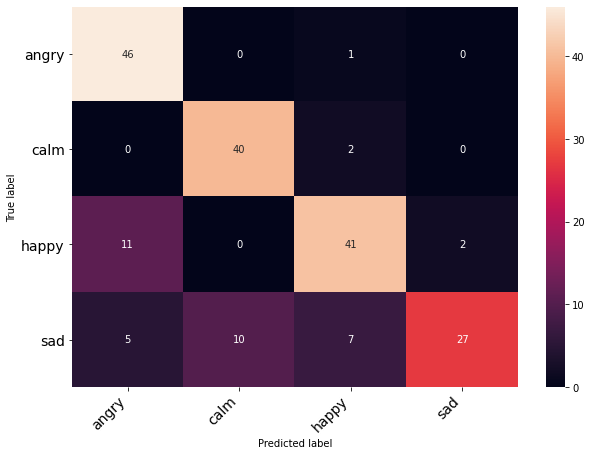

In [ ]:
results = get_results(model_history,model,X_test,y_test, audio_df.emotion.unique())
results.create_plot(model_history)
results.create_results(model)
results.confusion_results(X_test, y_test, audio_df.emotion.unique(), model)

In [ ]:
# Split between train and test 
X_train, X_test, y_train, y_test = train_test_split(mfcc
                                                    , ref.labels
                                                    , test_size=0.25
                                                    , shuffle=True
                                                    , random_state=42
                                                   )


# one hot encode the target 
lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

# Normalization as per the standard NN process
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

# Build CNN model 
model = get_2d_conv_model(n=n_mfcc)
model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                    batch_size=16, verbose = 2, epochs=20)

In [ ]:
results = get_results(model_history,model,X_test,y_test, ref.labels.unique())
results.create_plot(model_history)
results.create_results(model)
results.confusion_results(X_test, y_test, ref.labels.unique(), model)

## mfcc features

In [ ]:
# ITERATE OVER ALL AUDIO FILES AND EXTRACT LOG MEL SPECTROGRAM MEAN VALUES INTO DF FOR MODELING 
df = pd.DataFrame(columns=['mel_spectrogram'])

counter=0

for index,path in enumerate(audio_df.path):
    X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=3,sr=44100,offset=0.5)
    melspec =librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=128,fmax=8000)    
    logspec = librosa.amplitude_to_db(melspec)
    logspec = np.expand_dims(logspec, axis=-1)
    # X[cnt,] = logspec






    df.loc[counter] = [logspec]
    counter=counter+1   

print(len(df))
df.head()

768


mel_spectrogram
0  [[[-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], ...], [[-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-61.466633], [-64.15663], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], ...], [[-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-62.202812], [-63.471127], [-61.562653], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-63.562294], [-51.39733], [-54.440063], [-66.24904], [-66.24904], [-59.59075], [-60.27323], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-60.5335], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-65.88301], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], ...], [[-66.24904], [-66.24904], [-66.24904], [-66.24904], [

In [ ]:
print(df.iloc[0,0])

[[[-66.24904]
  [-66.24904]
  [-66.24904]
  ...
  [-66.24904]
  [-66.24904]
  [-66.24904]]

 [[-66.24904]
  [-66.24904]
  [-66.24904]
  ...
  [-66.24904]
  [-66.24904]
  [-66.24904]]

 [[-66.24904]
  [-66.24904]
  [-66.24904]
  ...
  [-66.24904]
  [-66.24904]
  [-66.24904]]

 ...

 [[-66.24904]
  [-66.24904]
  [-66.24904]
  ...
  [-66.24904]
  [-66.24904]
  [-66.24904]]

 [[-66.24904]
  [-66.24904]
  [-66.24904]
  ...
  [-66.24904]
  [-66.24904]
  [-66.24904]]

 [[-66.24904]
  [-66.24904]
  [-66.24904]
  ...
  [-66.24904]
  [-66.24904]
  [-66.24904]]]


In [ ]:
pd.DataFrame(df['mel_spectrogram'].values.tolist())

/usr/local/lib/python3.7/dist-packages/pandas/core/internals/construction.py:305: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array([convert(v) for v in values])


0
0    [[[-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], ...], [[-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-61.466633], [-64.15663], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], ...], [[-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-62.202812], [-63.471127], [-61.562653], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-63.562294], [-51.39733], [-54.440063], [-66.24904], [-66.24904], [-59.59075], [-60.27323], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-60.5335], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-65.88301], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], ...], [[-66.24904], [-66.24904], [-66.24904], [-66.24904], [-66.24904], 

## mel_spectrum

In [ ]:
sampling_rate=44100
audio_duration=2.5
n_melspec = 60
specgram = prepare_data(audio_df, n = n_melspec, aug = 0, mfcc = 0)



  0%|          | 0/768 [00:00<?, ?it/s]

  0%|          | 2/768 [00:00<00:52, 14.55it/s]

  1%|          | 4/768 [00:00<00:53, 14.37it/s]

  1%|          | 6/768 [00:00<00:55, 13.84it/s]

  1%|          | 8/768 [00:00<00:54, 13.93it/s]

  1%|▏         | 10/768 [00:00<00:54, 13.94it/s]

  2%|▏         | 12/768 [00:00<00:54, 13.91it/s]

  2%|▏         | 14/768 [00:01<00:54, 13.88it/s]

  2%|▏         | 16/768 [00:01<00:54, 13.82it/s]

  2%|▏         | 18/768 [00:01<00:54, 13.86it/s]

  3%|▎         | 20/768 [00:01<00:55, 13.54it/s]

  3%|▎         | 22/768 [00:01<00:55, 13.54it/s]

  3%|▎         | 24/768 [00:01<00:54, 13.74it/s]

  3%|▎         | 26/768 [00:01<00:54, 13.65it/s]

  4%|▎         | 28/768 [00:02<00:54, 13.67it/s]

  4%|▍         | 30/768 [00:02<00:54, 13.62it/s]

  4%|▍         | 32/768 [00:02<00:53, 13.70it/s]

  4%|▍         | 34/768 [00:02<00:53, 13.81it/s]

  5%|▍         | 36/768 [00:02<00:52, 13.89it/s]

  5%|▍         | 38/768 [00:02<00:52, 13.89it/s]

  5%|▌     

In [ ]:
# Split between train and test 
X_train, X_test, y_train, y_test = train_test_split(specgram
                                                    , audio_df.emotion
                                                    , test_size=0.25
                                                    , shuffle=True
                                                    , random_state=42
                                                   )



# one hot encode the target 
lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

# Normalization as per the standard NN process
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

# Build CNN model 
model = get_2d_conv_model(n=n_melspec)
model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                    batch_size=16, verbose = 2, epochs=20)

Epoch 1/20
36/36 - 35s - loss: 1.2622 - acc: 0.4479 - val_loss: 1.1988 - val_acc: 0.4896
Epoch 2/20
36/36 - 35s - loss: 1.1673 - acc: 0.4271 - val_loss: 1.0489 - val_acc: 0.4479
Epoch 3/20
36/36 - 35s - loss: 1.0858 - acc: 0.5017 - val_loss: 1.2012 - val_acc: 0.4635
Epoch 4/20
36/36 - 35s - loss: 1.0673 - acc: 0.5365 - val_loss: 1.2969 - val_acc: 0.2604
Epoch 5/20
36/36 - 35s - loss: 1.0199 - acc: 0.5139 - val_loss: 1.2259 - val_acc: 0.4010
Epoch 6/20
36/36 - 35s - loss: 0.9946 - acc: 0.5608 - val_loss: 1.1670 - val_acc: 0.4583
Epoch 7/20
36/36 - 35s - loss: 0.9549 - acc: 0.5573 - val_loss: 0.9963 - val_acc: 0.5625
Epoch 8/20
36/36 - 34s - loss: 0.9431 - acc: 0.5747 - val_loss: 0.9952 - val_acc: 0.4948
Epoch 9/20
36/36 - 35s - loss: 0.9247 - acc: 0.5972 - val_loss: 1.0258 - val_acc: 0.5521
Epoch 10/20
36/36 - 35s - loss: 0.8563 - acc: 0.6163 - val_loss: 1.0345 - val_acc: 0.5260
Epoch 11/20
36/36 - 35s - loss: 0.8672 - acc: 0.6233 - val_loss: 1.0903 - val_acc: 0.5208
Epoch 12/20
36/36 -